<a href="https://colab.research.google.com/github/lawsonk16/Remote-Sensing-Datasets/blob/main/Experimental_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experimental Options
Once you've converted a given dataset into the COCO format, this notebook provides what you need in order to:
 - chip large images to a different size (common for overhead datasets)
 - split the full dataset for train, val, and test

Here, the paths used are on FAIR1M in my own google drive, but switching up some file paths would let you use any coco dataset for these operations

<b> NOTE FOR COLAB USERS </b> For speed of processing, you will likely want to add whichever module you're looking for to the end of the notebook where you convert your data to the COCO format - since any files will already be locally available, just be sure to delete things as you go to avoid running out of space.

To Do:
 - GSD normalization
 - Chipping for classification
 - (more difficult) sliding chipping, or more complex chipping options

In [1]:
# first, mount your drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# this notebook uses scripts available in my git repo
import sys
notebook_folders = ['/content/drive/MyDrive/Colab Notebooks/scripts/']

for folder in notebook_folders:
    sys.path.append(folder)

from coco_utils.coco_help import *
from coco_data.fair1m_coco import *

import shutil
import os

## Part 0 - Get your data

Regardless of your process, you will need access to some annotations and imagery - get that locally available, or else point to it

In [2]:
# Set up some base file paths

# where the data currently is, and where you want to operate on it
og_data_folder = '/content/drive/MyDrive/Colab Notebooks/SCHOOL/Final Project/Data/FAIR1M/ISPRS Benchmark/FAIR1M1.0/train/'
data_folder = '/content/ISPRS Benchmark/train/'

# where the json is
json_path = 'fair1m_coco.json'

# where the imagery will be
images = f'{data_folder}images/'

# where you will store your resulting files
dst_folder = '/content/drive/MyDrive/Colab Notebooks/Clean Datasets/FAIR1M/'

In [4]:
# Copy any files you don't already have locally
shutil.copy('/content/drive/MyDrive/Colab Notebooks/Clean Datasets/FAIR1M/fair1m_coco.json', '/content/')

shutil.copytree(og_data_folder, data_folder)

# note that you will have to change this unopacking process for a different dataset
shutil.unpack_archive(f'{data_folder}part1/images.zip', data_folder)
shutil.unpack_archive(f'{data_folder}part1/labelXml.zip', data_folder)
shutil.rmtree(f'{data_folder}part1/')
shutil.unpack_archive(f'{data_folder}part2/images.zip', data_folder)
shutil.unpack_archive(f'{data_folder}part2/labelXmls.zip', data_folder)
shutil.rmtree(f'{data_folder}part2/')

## 1 -  Image Chipping

#### 1.1 Sub-Chip Images
 - Remote sensing images are often too large to work with in detectors, without chipping the images down to a smaller size. This function allows you to choose a new image size, and point to a COCO file. It will:
  - Chip the images
  - Adjust the annotations to the new imagery

In [4]:
# set up paths to newly chipped images
chip_size = 512
new_image_folder = f'FAIR1M_{chip_size}_images/'

# subchip images
# subchip_images(json_path, images, new_image_folder, chip_size)

#### 1.2 Check the Results

<Figure size 432x288 with 0 Axes>

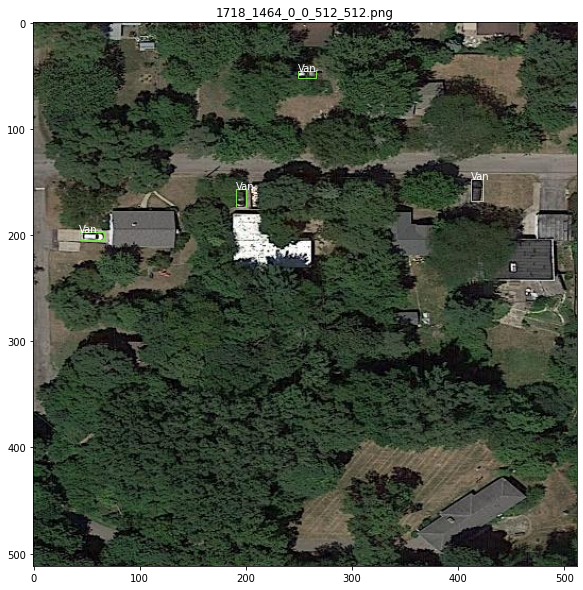

<Figure size 432x288 with 0 Axes>

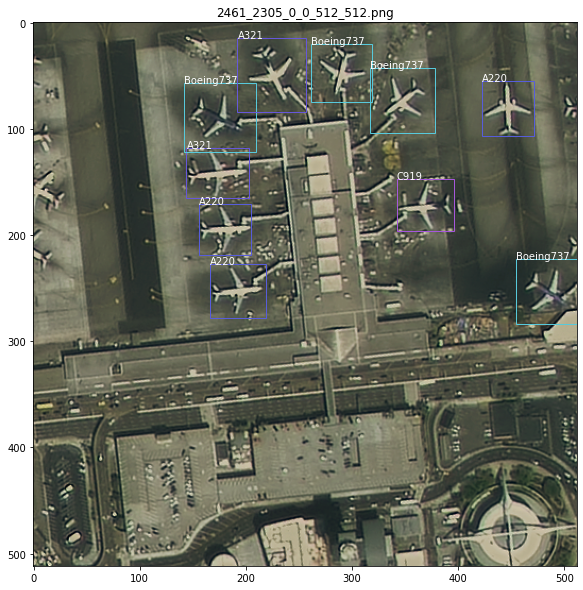

<Figure size 432x288 with 0 Axes>

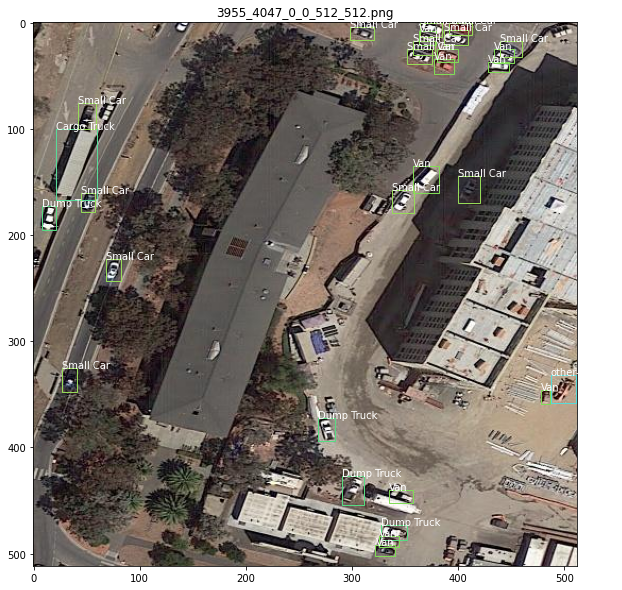

<Figure size 432x288 with 0 Axes>

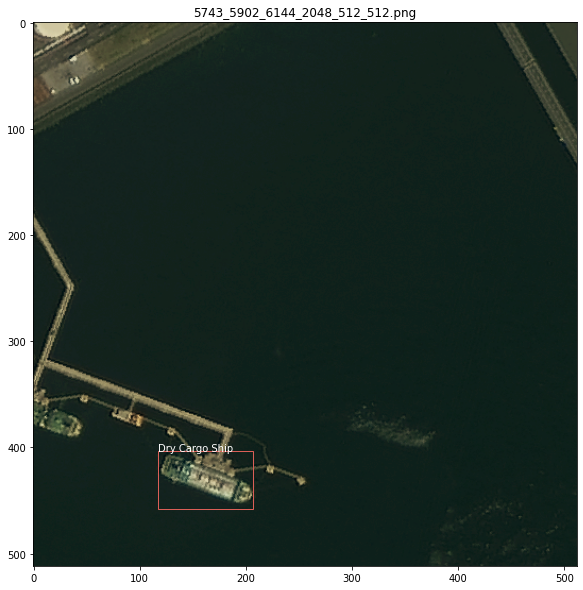

<Figure size 432x288 with 0 Axes>

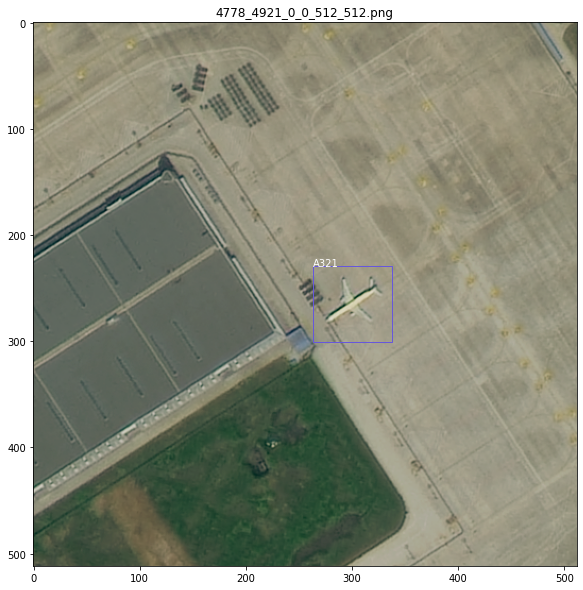

In [5]:
display_random_ims(5, f'/content/fair1m_coco_{chip_size}.json', f'/content/FAIR1M_{chip_size}_images/', (10,10))

#### (Optional) Move the files elsewhere
 - These file paths are absolute - change them to be relevant to your experimental parameters
 - If you are low on local storage, you can delete the pre-chipping imagery before creating your zip file 

In [7]:
def fix_fair1m_anns(ann_file):
    with open(ann_file, 'r') as f:
        gt = json.load(f)

    new_anns = []
    for a in gt['annotations']:
        new_a = a.copy()
        [x,y,w,h] = a['bbox']
        new_a['area'] = w*h
        if new_a['area'] > 0:
          new_anns.append(new_a)

    gt['annotations'] = new_anns


    new_images = []
    for img in tqdm(gt['images']):
        im_id = img['id']
        if len(anns_on_image(im_id, gt)) > 0 :
            new_images.append(img)

    gt['images'] = new_images

    with open(ann_file, 'w') as f:
        json.dump(gt, f)
    return


In [8]:
fix_fair1m_anns(f'/content/fair1m_coco_{chip_size}.json')

100%|██████████| 15150/15150 [07:35<00:00, 33.25it/s]


In [9]:
# Zip up your new images
shutil.make_archive(f'images_{chip_size}', 'zip', f'/content/FAIR1M_{chip_size}_images/')

# Copy the annotations and imagery
shutil.copy2(f'images_{chip_size}.zip', dst_folder)
shutil.copy2(f'/content/fair1m_coco_{chip_size}.json', dst_folder)

'/content/drive/MyDrive/Colab Notebooks/Clean Datasets/FAIR1M/fair1m_coco_512.json'

## 2 - Train, Val, Test Splits

Given your coco data and imagery, make a train, val, and test split

Demonstrated here on the newly chipped imagery from section 1

In [11]:
json_path = f'/content/fair1m_coco_{chip_size}.json'
img_dir = f'/content/FAIR1M_{chip_size}_images/'

#### 2.1 Make your train, val, and test split

In [12]:
# choose the percentages of data you'd like to work with
val_p = 0.2
test_p = 0.3

train_val_test_split(img_dir, json_path, val_p, test_p)

Num images 15150
gt created


'/content/'

#### 2.2 Optional - Move the files

In [13]:
# first, remove the initial, full json
os.remove(json_path)

In [ ]:
for f in 

In [ ]:
# zip up the full experimental split
exp_dir = f'/content/FAIR1M_{chip_size}/'
exp_name = f'FAIR1M_{chip_size}_50-20-30'

shutil.make_archive(exp_name, 'zip', exp_dir)

In [ ]:
shutil.copy2(f'/content/FAIR1M_{chip_size}_50-20-30.zip', dst_folder)